<a href="https://colab.research.google.com/github/RavelPaniagua/IA-con-Python/blob/main/Set_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
datos = pd.read_csv("casas_de_california.csv")
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
#revisando la informacion de los datos vemos que hay informaciones nulas en la columna total_bedrooms
#estos datos nulos vamos a proceder a eliminarlos

datos_na = datos.dropna() # elimina los datos nulos
datos_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
datos_na["ocean_proximity"] #para poder corregir estos datos y que nuestro modelo lo pueda entender correctamente debemos de crear algo llamado dummies

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [6]:
dummies = pd.get_dummies(datos_na["ocean_proximity"],dtype=int)

In [8]:
# luego de tener nuestros dummies los unimos con nuestro set de datos con join()
datos_na = datos_na.join(dummies)

In [14]:
#como aún tenemos en nuestro set de datos la columna de texto ocen_proximity debemos eliminarla y para eso podemos usar el metodo drop
datos_na = datos_na.drop(["ocean_proximity"],axis = 1) # y para especificarle al metodo drop que es una columna de le debe pasar el parametro axis = 1
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [20]:
#Luego de haber corregido nuesto set de datos vamos a buscar la correlacion de todos los datos con relacion a nuestra etiqueta o salida que será el precio de las casas
# o median_house_value que es el valor promedio de nuestras casas segun nuestro set de datos

datos_na.corr()["median_house_value"].sort_values(ascending=False)
# con esta line le estamos diciendo que nos muestre la correlacion de nuestra columna median_house_value con relacion a todas las demas columnas y que nos las ordene en orden ascendente


,median_house_value
median_house_value,1.000000
median_income,0.688355
<1H OCEAN,0.257614
NEAR BAY,0.160526
NEAR OCEAN,0.140378
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
total_bedrooms,0.049686
ISLAND,0.023525


<Axes: xlabel='median_house_value', ylabel='median_income'>

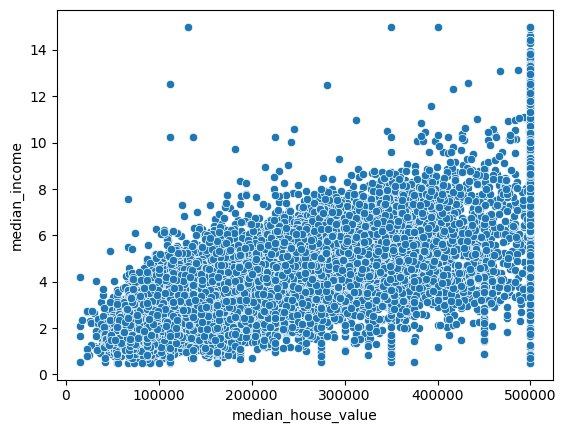

In [21]:
#vamos a ver graficamente la correlación mayor que existe entre nuestra columna principal que es la etiqueta o salida con la que tiene mayor relacion según el resultado anterior
import seaborn as sb
sb.scatterplot(x=datos_na["median_house_value"],y=datos_na["median_income"])

<Axes: >

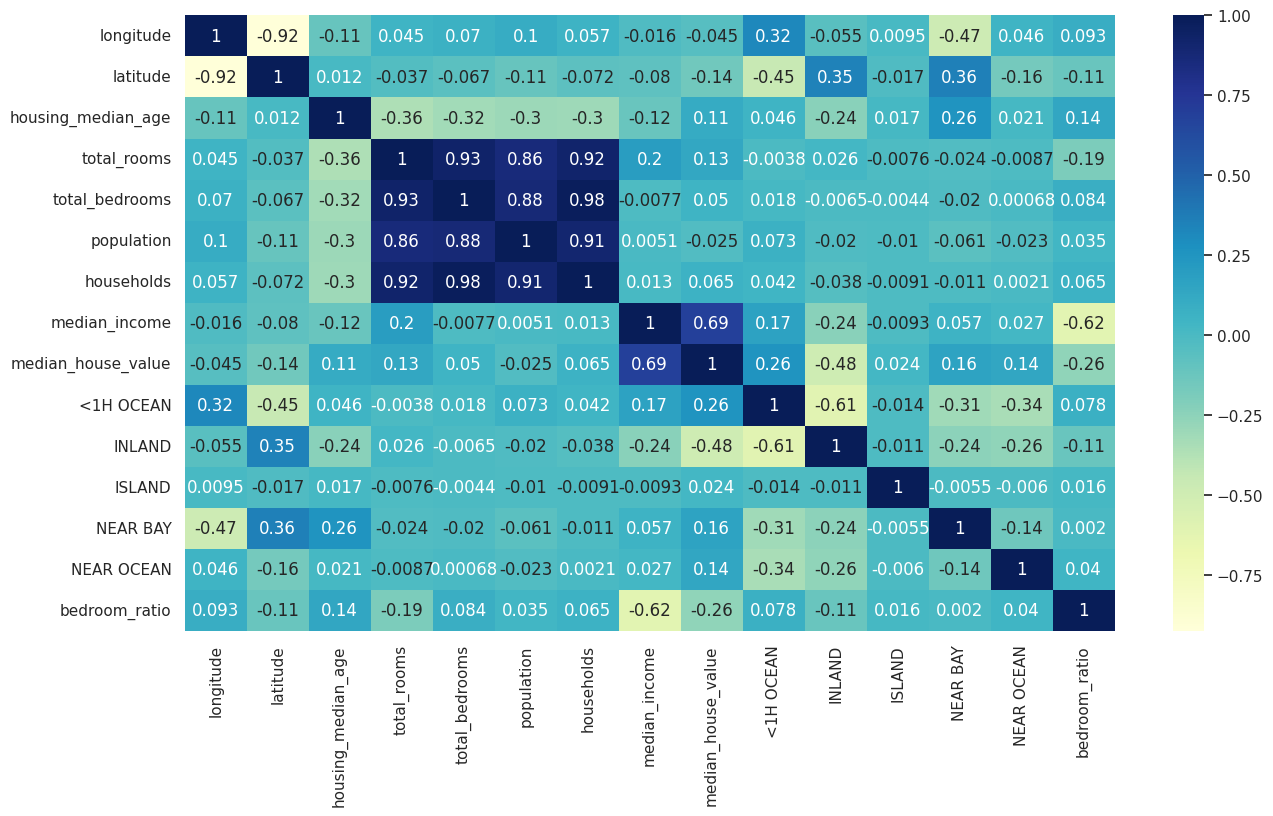

In [23]:
#para agregar mas caracteristicas a nuestro set de datos hacemos lo siguiente
# por ejemplo vamos a inventarnos una nueva caracteristica para nuestro set de datos
datos_na["bedroom_ratio"] = datos_na["total_bedrooms"] / datos_na["total_rooms"]

#vamos a ver graficamente las correlaciones y para ver la relacion de la nueva caracteristica que acabamos de crear
sb.set(rc={"figure.figsize":(15,8)}) # esta linea agranda un poco mas la grafica
sb.heatmap(datos_na.corr(),annot=True, cmap="YlGnBu") # aqui creamos nuestra grafica de correlacion, annot es para que muestre los valores y cmap para que tome cuna paleta de colores de amarillo, verde a azul


In [25]:
#ahora vamos a separar nuestras caracteristicas de nuestra etiqueta o salida
X = datos_na.drop(["median_house_value"],axis = 1)
y = datos_na["median_house_value"]

In [35]:
# podemos separar nuestros datos en 2 conjuntos que mas adelante nos pueden ayudar a ver que tan bien le fue a nuestro modelo cuando lo entrenemos y esto lo podemos hacer con
# sklearn.model_selection
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X,y,test_size=.2)



In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Entrenar con los datos de entrenamiento
model.fit(X_ent,y_ent)

LinearRegression()

In [42]:
#en la predicciones utilizamos nuestros datos que separamos para las prediciones
predicciones = model.predict(X_pru)

#usamos pandas para mostrar este conjunto de datos en un DataFrame
pd.DataFrame(predicciones)

,0
0,161208.137457
1,129304.889076
2,323246.236247
3,213837.222850
4,149106.660091
...,...
4082,164361.106070
4083,169545.175767
4084,77759.974810
4085,181150.889754


In [43]:
# para colocarle encabezados a mi DataFrame de pandas pordemos hace lo siguiente
comparativa = {"predicciones":predicciones,"valores_real":y_pru}
pd.DataFrame(comparativa)

,predicciones,valores_real
4166,161208.137457,166300.0
11725,129304.889076,154500.0
18111,323246.236247,326300.0
9425,213837.222850,242600.0
7238,149106.660091,151100.0
...,...,...
2271,164361.106070,96500.0
4522,169545.175767,165000.0
3164,77759.974810,57300.0
19452,181150.889754,162100.0


In [45]:
# verificar si estamos sufriendo de un sobre ajuste o sobre entrenamiento y esto lo que puede ocacionar que con nuestros datos de prueba no funcione bien el modelo
# verificamos el Overfitting o sobreajuste
print(model.score(X_ent,y_ent))
print(model.score(X_pru,y_pru))

0.6529096662020262
0.6471847028566807


In [54]:
# otra cosa que podemos verificar es el Error
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_pru,predicciones)
mse

# esta es la cantidad de errores, por lo regular para corregir los errores podemos elevar al cuadrado estos errores para que los valores negativos se conviertan en valores positivos
#y para que estos asu vez sean mas notorios y esto lo podemos hacer con numpy

rmse = np.sqrt(mse) # con sacarle la raiz cuadrada a los errores podemos ver en promedio cuanto esta fallando nuestro modelo
rmse

np.float64(68341.69018720582)

In [57]:
datos_na.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# para que el modelo no le de mas preferencia a los numeros mas grandes podemos hacer lo que se llama un preprocesamiento
from sklearn.preprocessing import StandardScaler
# no es necesario escalar la etiqueta o salida solamente las caracteristicas o entradas X
scaler = StandardScaler()
X_ent_esc = scaler.fit_transform(X_ent)
X_pru_esc = scaler.fit_transform(X_pru)

X_ent_esc

# lo colocamos en un DataFrame para ver los datos mejor
pd.DataFrame(X_ent_esc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.153611,-1.324661,0.662740,-0.473887,-0.275271,-0.706058,-0.270513,-0.495683,-0.88451,-0.686407,-0.013549,-0.3532,2.590440,0.804799
1,-0.248705,0.626578,-0.050222,-0.499153,-0.319019,0.137376,-0.235699,-1.205773,-0.88451,1.456861,-0.013549,-0.3532,-0.386035,0.758976
2,0.844203,-0.705518,0.345868,0.525803,0.446557,0.637531,0.599844,0.072002,1.13057,-0.686407,-0.013549,-0.3532,-0.386035,-0.342278
3,-0.902454,1.428650,0.900394,-1.212332,-1.257153,-1.259734,-1.242635,-1.104332,-0.88451,1.456861,-0.013549,-0.3532,-0.386035,0.688828
4,0.609652,-0.775875,1.454920,-0.046742,-0.178056,-0.307411,-0.187494,-0.021782,1.13057,-0.686407,-0.013549,-0.3532,-0.386035,-0.510645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-0.133925,0.560911,-0.921621,0.191620,-0.306867,-0.395076,-0.358888,1.864696,-0.88451,1.456861,-0.013549,-0.3532,-0.386035,-1.331696
16342,0.779327,-0.813399,-0.208659,0.170644,0.339620,0.221350,0.353466,0.390436,1.13057,-0.686407,-0.013549,-0.3532,-0.386035,0.233682
16343,0.599671,-0.700827,-0.604749,0.982028,1.523224,0.460354,1.601424,-0.034842,1.13057,-0.686407,-0.013549,-0.3532,-0.386035,0.601306
16344,0.280282,-0.119208,1.217266,-1.037374,-1.031126,-1.053029,-1.098022,-1.400789,-0.88451,1.456861,-0.013549,-0.3532,-0.386035,0.684128
